# **DevTown - Python and Machine Learning Bootcamp**

## **Capstone Project** -  House Price Prediction

### **Objective** -  Predict housing prices based on its features using linear regression.

### **Author** :  Sampson Chinonso Ipiankama

# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression # OLS alogrithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge #Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.metrics import explained_variance_score as evs #evaluation

# Import Dataset


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing Dataset.csv')

# Exploratory Data Analysis

In [3]:
df.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Check the dimensions of the dataset
print("The housing price data dimensions: {}".format(df.shape))

The housing price data dimensions: (545, 13)


In [5]:
df.info() # To get a conscise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Visualization

In this step I am going to produce two types of charts.
1. Heatmap
2. Distribution Plot 

# Heatmap

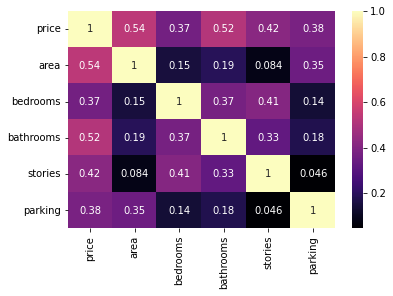

In [6]:
# It is useful to show the relationship between two variables in the dataset.
sns.heatmap(df.corr(), annot = True, cmap = "magma")
plt.show()

# Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

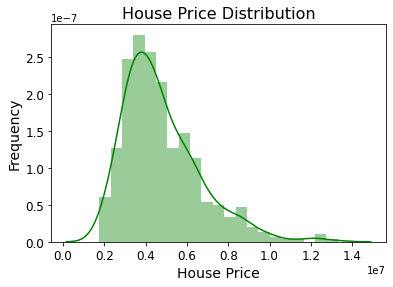

In [7]:
# It is useful to check how well a variable is distributed in the dataset.
sns.distplot(df["price"], color = "g")
plt.title('House Price Distribution', fontsize = 16)
plt.xlabel('House Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show

# Label Encoder

The folowing columns are in are object type but their labels need to be converted to numerical(int64) data which our predictive model can better understand.  

1. mainroad 
2.guestroom
3. basement
4. hotwaterheating
5. airconditioning
6. prefarea
7. furnishingstatus

I'd use Label Encoder to convert the categorical data into numerical data.

In [8]:
#find the counts of the different labels
df["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [9]:
#find the counts of the different labels
df["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [10]:
df["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [11]:
df["hotwaterheating"].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [12]:
df["airconditioning"].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [13]:
df["prefarea"].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [14]:
df["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

### a) Label Encoder for mainroad

In [15]:
# Load the labelEncoder function
label_encoder = LabelEncoder()

In [16]:
labels1 = label_encoder.fit_transform(df.mainroad)

In [17]:
# Append the labels to the DataFrame
df["mainroad1"] = labels1

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad1
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1


Kindly note that when you use the Label Encoder function, the labels present in the particular column will be arranged alphabetically. That's why mainroad has been encoded as

no --> 0

yes --> 1

### b) Label Encoder for guestroom

In [19]:
# Load the labelEncoder function
label_encoder = LabelEncoder()

In [20]:
labels = label_encoder.fit_transform(df.guestroom)

In [21]:
# Append the labels to the DataFrame
df["guestroom1"] = labels

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad1,guestroom1
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1


Kindly note that when you use the  Label Encoder function, the labels present in the particular column will be arrange alphabetically. That's why guestroom has been encoded as 

no --> 0

yes --> 1

### C) Label Encoder for basement

In [23]:
# Load the labelEncoder function
label_encoder = LabelEncoder()
labels2 = label_encoder.fit_transform(df.basement)
df["basement1"] = labels2 # Append the labels to the DataFrame

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad1,guestroom1,basement1
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1


### d) Label Encoder for hotwaterheating	

In [25]:
# Load the labelEncoder function
label_encoder = LabelEncoder()
labels3 = label_encoder.fit_transform(df.hotwaterheating)
df["hotwaterheating1"] = labels3 # Append the labels to the DataFrame

### e) Label Encoder for airconditioning

In [26]:
# Load the labelEncoder function
label_encoder = LabelEncoder()
labels4 = label_encoder.fit_transform(df.airconditioning)
df["airconditioning1"] = labels4 # Append the labels to the DataFrame

### f) Label Encoder for prefarea

In [27]:
# Load the labelEncoder function
label_encoder = LabelEncoder()
labels5 = label_encoder.fit_transform(df.prefarea)
df["prefarea1"] = labels5 # Append the labels to the DataFrame

### f) Label Encoder for furnishingstatus

In [28]:
# Load the labelEncoder function
label_encoder = LabelEncoder()
labels6 = label_encoder.fit_transform(df.furnishingstatus)
df["furnishingstatus1"] = labels6 # Append the labels to the DataFrame

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad1,guestroom1,basement1,hotwaterheating1,airconditioning1,prefarea1,furnishingstatus1
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0


Kindly note that when you use the Label Encoder function, the labels present in the particular column will be arrange alphabetically. That's why the colum furnishingstatus has been encoded as

furnished --> 0

semi-furnished --> 1

unfurnished --> 2

In [30]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'mainroad1', 'guestroom1',
       'basement1', 'hotwaterheating1', 'airconditioning1', 'prefarea1',
       'furnishingstatus1'],
      dtype='object')

# Feature Selection and Data Split

In [31]:
x_var = df[["area", "bedrooms", "bathrooms", "stories", "mainroad1", "guestroom1", "basement1", "hotwaterheating1", "airconditioning1", "parking", "prefarea1", "furnishingstatus1"]].values
y_var = df["price"].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 0 )

In [33]:
print(len(X_train))

436


In [34]:
print(len(X_test))

109


# Feature Scaling 

Because dataset contains features highly varying in magnitudes, units and range, we will use scaling to bring all features to the same level of magnitudes. In essence what this means is  that we are transforming the data so that it fits within a specific scale, like 0–100 or 0–1.

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
model_yhat = model.predict(X_test)

## Ridge Model

In [37]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

## Lasso Model

In [38]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

## Bayesian Model

In [39]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

## ElasticNet Model

In [40]:
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

# Model Evaluation

To evaluate our model we are going to use the ‘explained_variance_score’ metric and the ‘r2_score’ metric functions which are provided by the scikit-learn package in python.

When it comes to the ‘explained_variance_score’ metric, the score should not below 0.60 or 60%. If it is the case, then our built model is not sufficient for our data to solve the given case. So, the ideal score of the ‘explained_variance_score’ should be between 0.60 and 1.0.

The next evaluation metric is the ‘r2_score’ (R-squared) metric. What is R-squared? R-squared is a measurement of how well the dependent variable explains the variance of the independent variable. It is the most popular evaluation metric for regression models. The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).

We are now going to compare the metric scores of each model and choose which model is more suitable for the given dataset. Let’s start with the ‘explained_variance_score’ evaluation metric in python.

# Explained Variance Score

## 1. OLS Regression

In [44]:
print("Explained Variance Score")
print("---------------------------------------------------------------")
print("The Explained Variance Score of the OLS Model is {}".format(evs(y_test, model_yhat)))

Explained Variance Score
---------------------------------------------------------------
The Explained Variance Score of the OLS Model is 0.6602066022534329


## 2. Ridge Model

In [45]:
print("Explained Variance Score")
print("---------------------------------------------------------------")
print("The Explained Variance Score of the Ridge Model is {}".format(evs(y_test, ridge_yhat)))

Explained Variance Score
---------------------------------------------------------------
The Explained Variance Score of the Ridge Model is 0.6603486950351048


# 3. Lasso Model

In [46]:
print("Explained Variance Score")
print("---------------------------------------------------------------")
print("The Explained Variance Score of the Lasso Model is {}".format(evs(y_test, lasso_yhat)))

Explained Variance Score
---------------------------------------------------------------
The Explained Variance Score of the Lasso Model is 0.6602066428863006


# 4. Bayesian Model

In [48]:
print("Explained Variance Score")
print("---------------------------------------------------------------")
print("The Explained Variance Score of the Bayesian Model is {}".format(evs(y_test, bayesian_yhat)))

Explained Variance Score
---------------------------------------------------------------
The Explained Variance Score of the Bayesian Model is 4.416849108679344e-10


# 5. ElasticNet Model

In [49]:
print("Explained Variance Score")
print("---------------------------------------------------------------")
print("The Explained Variance Score of the ElasticNet Model is {}".format(evs(y_test, en_yhat)))

Explained Variance Score
---------------------------------------------------------------
The Explained Variance Score of the ElasticNet Model is 0.6608179204662374


# **Insight:**
We can see that, every model aside the Bayesian model while rounding the output values will result in a score of 0.66 (66%) which means our model as the Bayesian model performs well on our dataset and can be used to solve real-world problems. Coming to the case of choosing the best model, the Elastic Net regression model takes the place of being more accurate while comparing the other models (on the basis of Explained Variance Score). It is followed by the Ridge regression model. The worst performer among the models is the Bayesian regression model.

# R-squared(r2) Metric Evaluation

# 1. OLS Model

In [51]:
print("R-Squared:")
print("---------------------------")
print("R-Squared of the OLS model is {}".format(r2_score(y_test, model_yhat)))

R-Squared:
---------------------------
R-Squared of the OLS model is 0.6578047592637607


# 2. Ridge Model

In [53]:
print("R-Squared:")
print("----------------------------------------------------------------------------")
print("The R-Squared of the Rideg model is {}".format(r2_score(y_test, ridge_yhat)))

R-Squared:
----------------------------------------------------------------------------
The R-Squared of the Rideg model is 0.6579512537424944


# 3. Lasso Model

In [54]:
print("R-Squared:")
print("--------------------------------------------------------------")
print("The R-Squared of the Lasso model is {}".format(r2_score(y_test, lasso_yhat)))

R-Squared:
--------------------------------------------------------------
The R-Squared of the Lasso model is 0.6578048010038656


# 4. Bayesian Model

In [55]:
print("R-Squared:")
print("--------------------------------------------------")
print("The R-Squared of the Bayesian model is {}".format(r2_score(y_test, bayesian_yhat)))

R-Squared:
--------------------------------------------------
The R-Squared of the Bayesian model is -0.0010319159668772393


# 5. ElasticNet Model

In [58]:
print("R-Squared:")
print("--------------------------------------------------------------")
print("The R-Squared of the ElasticNet model is {}".format(r2_score(y_test, en_yhat)))

R-Squared:
--------------------------------------------------------------
The R-Squared of the ElasticNet model is 0.6584350559710188


# Insight: 

When analyzing the report, it is noted that the R-squared of the Elastic Net regression model is seemed to be the highest which means, it takes the place of being the most suitable model for our dataset (on the basis of R-squared). It is followed by the Ridge regression model. The worst performer among the models is the Bayesian regression model so, it is more ideal to neglect the Bayesian regression model for our dataset.

We can conclude that Elastic Net regression models can be used for our house price dataset.